In [10]:
def first_denomination(kinds_of_coins):
    if   kinds_of_coins == 1: 
        return 1
    elif kinds_of_coins == 2: 
        return 5
    elif kinds_of_coins == 3: 
        return 10
    elif kinds_of_coins == 4: 
        return 25
    elif kinds_of_coins == 5: 
        return 50
    return 0

def cc(amount, kinds_of_coins, num_steps):
    if amount == 0:
        return 1, num_steps + 1
    elif amount < 0 or kinds_of_coins == 0:
        return 0, num_steps + 1
    else:
        cc_lhs, num_steps = cc(amount, kinds_of_coins - 1, num_steps + 1)
        cc_rhs, num_steps = cc(amount - first_denomination(kinds_of_coins), kinds_of_coins, num_steps + 1)
        return cc_lhs + cc_rhs, num_steps + 1


def count_change(amount):
    final_change, num_steps = cc(amount, 5, 0)
    return final_change, num_steps

In [14]:
start_amount = 11
stop_amount = 200
res_pairs = [
    count_change(amount) 
    for amount in range(start_amount, stop_amount + 1)
]

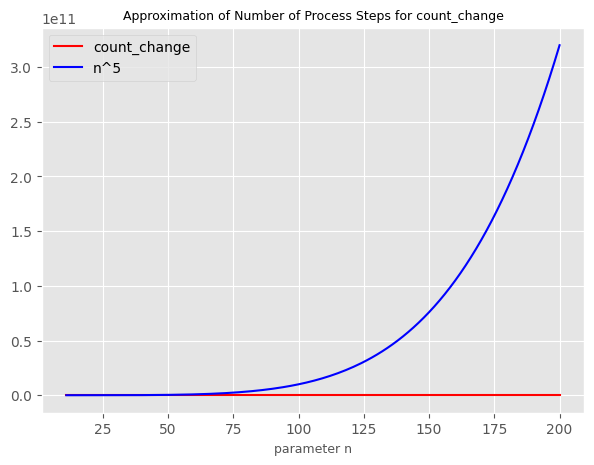

In [16]:
import matplotlib.pyplot as plt
import numpy as np

n_params = np.arange(start_amount, stop_amount + 1)

changes = [ pair[0] for pair in res_pairs ]
steps = [ pair[1] for pair in res_pairs ]

figsize = (7, 5)
plt.figure(figsize=figsize)
plt.style.use('ggplot')

plt.plot(n_params, steps, label='count_change', color='red')
plt.plot(n_params, n_params ** 5, label='n^5', color='blue')
# plt.scatter(n_params, n_params ** 5, label='steps', color='black', zorder=2)
# plt.plot(n_params, n_params ** 5, label='n^2.4', color='yellow')

fontsize = 9
plt.title('Approximation of Number of Process Steps for count_change', fontsize=fontsize)
plt.xlabel('parameter n', fontsize=fontsize)
plt.legend()
plt.show()
